In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'A': range(1, 11), 'B': np.random.random(10)})
# print(df.A)
pd.qcut(df.A,6, labels=False)

0    0
1    0
2    1
3    1
4    2
5    3
6    3
7    4
8    5
9    5
Name: A, dtype: int64

In [3]:
# pd.qcut?

In [4]:
df = pd.DataFrame(np.random.randn(10, 4),columns=list('ABCD'))
df

,A,B,C,D
0,-0.151691,-0.592410,0.533370,0.154452
1,-0.463528,-0.002133,1.100637,-1.201732
2,-0.735006,-1.025924,-0.503369,-0.842585
3,1.191254,-1.250354,-1.347062,-0.452275
4,0.416819,0.483267,0.942329,-1.273506
5,1.558408,-0.159437,0.176908,-0.814880
6,0.232587,0.124163,-0.618614,-0.950951
7,0.546415,-0.381949,0.821125,0.039424
8,0.452939,-2.000690,0.139197,-0.285869
9,0.246120,-1.478558,1.176804,0.943393


In [5]:
df.B.describe()

count    10.000000
mean     -0.628403
std       0.790719
min      -2.000690
25%      -1.194247
50%      -0.487180
75%      -0.041459
max       0.483267
Name: B, dtype: float64

In [6]:
df.C.sort_values(ascending = False).tail(3)

2   -0.503369
6   -0.618614
3   -1.347062
Name: C, dtype: float64

In [7]:
#describe()方法返回：count,mean,std,min,max,25%,50%,75%

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
A    10 non-null float64
B    10 non-null float64
C    10 non-null float64
D    10 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes


In [9]:
df = pd.DataFrame({'A':['1','2','3','4']})

In [10]:
df.A.apply(lambda x:int(x)).sum()

10

In [11]:
# pd.DataFrame({'A':[1],'B':[8]})

# pd.reindex pd.rename

In [12]:
df = pd.DataFrame({'A':['1','2','3','4']})

In [13]:
df

,A
0,1
1,2
2,3
3,4


In [14]:
df.reindex(['a','b','c','d',1,2])

,A
a,NaN
b,NaN
c,NaN
d,NaN
1,2
2,3


In [15]:
index = ['Firefox','Chrome','Safari','IE10','Konqueror']
df = pd.DataFrame({'http_status':[200,200,404,404,301],
                  'response_time':[0.04,0.02,0.07,0.08,1.0],
                  },index = index)

In [16]:
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [17]:
new_index = ['Safari','Iceweasel','Comodo Dragon','IE10','Chrome']
df.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


In [18]:
df.reindex(new_index,fill_value = 0)

,http_status,response_time
Safari,404,0.07
Iceweasel,0,0.00
Comodo Dragon,0,0.00
IE10,404,0.08
Chrome,200,0.02


In [19]:
df.reindex(new_index,fill_value = 'missing')

,http_status,response_time
Safari,404,0.07
Iceweasel,missing,missing
Comodo Dragon,missing,missing
IE10,404,0.08
Chrome,200,0.02


In [20]:
df.reindex(columns = ['http_status','user_agent'])

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


In [21]:
df.reindex(['http_status','user_agent'],axis='columns')

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


In [22]:
df = pd.DataFrame({'A':[1,2,3],'B':[4,5,6]})
df.rename(index = str,columns = {'A':'a','B':'c'})

,a,c
0,1,4
1,2,5
2,3,6


In [23]:
df.rename(index = str,columns = {'A':'a','C':'c'})

,a,B
0,1,4
1,2,5
2,3,6


In [24]:
df.index.dtype

dtype('int64')

In [25]:
df.rename(str.lower,axis=  'columns')

,a,b
0,1,4
1,2,5
2,3,6


In [26]:
df.rename({1:2,2:4},axis=  'index')

,A,B
0,1,4
2,2,5
4,3,6


In [27]:
data = pd.DataFrame({'订单号':[1,1,2,2,3,4,5],'数量':[1,3,4,5,3,2,5],'商品名称':['汉堡','可乐','热狗','汉堡','冰淇淋','掉渣饼','全家桶'],'单价':['￥5','￥2','￥3','￥5','￥3','￥7','￥10']})

In [28]:
data.单价 = data.单价.apply(lambda x:int(x[1:]))

In [29]:
data

,订单号,数量,商品名称,单价
0,1,1,汉堡,5
1,1,3,可乐,2
2,2,4,热狗,3
3,2,5,汉堡,5
4,3,3,冰淇淋,3
5,4,2,掉渣饼,7
6,5,5,全家桶,10


In [30]:
num1 = data.groupby('商品名称').数量.sum().sort_values(ascending = False).head(1)

In [31]:
list(num1.index)

['汉堡']

In [32]:
num1.index[0]

'汉堡'

In [33]:
data[data.商品名称.isin(list(num1.index))]['单价'][0]

5

In [34]:
a = data.groupby('商品名称')
data[data.商品名称.isin([a.sum().sort_values('数量',ascending = False).head(1).index[0]])].单价

0    5
3    5
Name: 单价, dtype: int64

In [35]:
s = data.groupby('订单号').apply(lambda x:x.单价*x.数量).sum(level=0).sort_values(ascending = False)

In [36]:
s

订单号
5    50
2    37
4    14
1    11
3     9
dtype: int64

In [37]:
# s.sum(level=0).sort_values(ascending = False).head(1)

In [38]:
data['总价'] = data.数量 * data.单价
a = data.groupby('订单号').sum().总价
a.sort_values(ascending = False).head(1)

订单号
5    50
Name: 总价, dtype: int64

In [39]:
data.数量.sum()

23

In [40]:
data.商品名称.nunique()

6

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
订单号     7 non-null int64
数量      7 non-null int64
商品名称    7 non-null object
单价      7 non-null int64
总价      7 non-null int64
dtypes: int64(4), object(1)
memory usage: 360.0+ bytes


In [42]:
df = pd.DataFrame({"A":np.arange(1,5),
"B":np.arange(1,5),
"C":np.arange(1,5),
"D":np.arange(1,5),
"E":np.arange(1,5),})

In [43]:
df[['A','C','E']]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [44]:
df.loc[:,['A','C','E']]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [45]:
df.iloc[:,[0,2,4]]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [46]:
df.iloc[:,::2]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [47]:
df.loc[:,::2]

,A,C,E
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4


In [48]:
df = pd.DataFrame({"A":np.arange(1,5),
"B":[4,1,6,8],
"C":np.arange(5,9),
"D":np.arange(8,12),
"E":[10,5,3,9]})

In [49]:
df

,A,B,C,D,E
0,1,4,5,8,10
1,2,1,6,9,5
2,3,6,7,10,3
3,4,8,8,11,9


In [50]:
# df.sort_index(axis=1,ascending = True)

In [51]:
df.sort_values('B').sort_values('E')

,A,B,C,D,E
2,3,6,7,10,3
1,2,1,6,9,5
3,4,8,8,11,9
0,1,4,5,8,10


In [52]:
df.sort_values(['B','E'])

,A,B,C,D,E
1,2,1,6,9,5
0,1,4,5,8,10
2,3,6,7,10,3
3,4,8,8,11,9


In [53]:
d1 = {'b':[1,2,3],'a':[3,4,6]}
pd.DataFrame(d1,columns = d1.keys())

,b,a
0,1,3
1,2,4
2,3,6


In [54]:
df = pd.DataFrame({"A":np.arange(1,5),
"B":np.arange(2,6),
"C":np.arange(5,9),
"D":np.arange(1,5),
"E":np.arange(6,10)})

In [55]:
df.A.apply(lambda x:x if x !=5 else 0)

0    1
1    2
2    3
3    4
Name: A, dtype: int64

In [56]:
df.A.agg(lambda x:0 if x==5 else x)

0    1
1    2
2    3
3    4
Name: A, dtype: int64

In [57]:
df[df.columns[:-3]]

,A,B
0,1,2
1,2,3
2,3,4
3,4,5


In [58]:
df.iloc[:,:-3]

,A,B
0,1,2
1,2,3
2,3,4
3,4,5


In [59]:
df.loc[:,list('AB')]

,A,B
0,1,2
1,2,3
2,3,4
3,4,5


In [60]:
df.loc[:,('C','D','E')]

,C,D,E
0,5,1,6
1,6,2,7
2,7,3,8
3,8,4,9


In [61]:
df = pd.DataFrame(np.arange(10,20).reshape(5,2))

In [62]:
df

,0,1
0,10,11
1,12,13
2,14,15
3,16,17
4,18,19


In [63]:
df[(df>15)|(df<13)].fillna(np.nan)

,0,1
0,10.0,11.0
1,12.0,NaN
2,NaN,NaN
3,16.0,17.0
4,18.0,19.0


In [64]:
df = pd.DataFrame({'one':np.random.randint(10,20,5),
                  'two':'too',
                  'three':np.arange(15,20)})

In [65]:
df[df.one>15]

,one,two,three
1,19,too,16
3,19,too,18


In [66]:
df = pd.DataFrame({ 'A' : 1.,
                      'C':pd.Series(1,index=list(range(1,5)),dtype='float32'),
                     'D' : np.array([3] *4,dtype='int32'),
                     'E':pd.Categorical(["test","train","test","train"]),
                   'F' : 'foo' })

In [67]:
df.loc[3]

A       1
C       1
D       3
E    test
F     foo
Name: 3, dtype: object

In [68]:
df.iloc[:,1]

1    1.0
2    1.0
3    1.0
4    1.0
Name: C, dtype: float32

In [69]:
df = pd.DataFrame({'A':2.,
                 'B':5.,
                 'C':pd.Series(np.arange(0,5),index = list('abcde')),
                  'D':'too'})

In [70]:
df

,A,B,C,D
a,2.0,5.0,0,too
b,2.0,5.0,1,too
c,2.0,5.0,2,too
d,2.0,5.0,3,too
e,2.0,5.0,4,too


In [71]:
df.loc[['a','c','e'],['A','C','D']]

,A,C,D
a,2.0,0,too
c,2.0,2,too
e,2.0,4,too


In [72]:
df.iloc[[0,2,4],[0,2,3]]

,A,C,D
a,2.0,0,too
c,2.0,2,too
e,2.0,4,too


In [73]:
df = pd.DataFrame({'A':[3,2,5,2,1,6,3,4,5],'B':[4,6,3,7,2,9,2,7,7]})

In [74]:
df.A.unique()

array([3, 2, 5, 1, 6, 4], dtype=int64)

In [75]:
df.B.nunique()

6

In [76]:
df = pd.DataFrame(np.arange(12).reshape(3,4),
...                   columns=['A', 'B', 'C', 'D'])

In [77]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [78]:
df.drop(['B','C'],axis=1,inplace = False)

,A,D
0,0,3
1,4,7
2,8,11


In [79]:
df.drop(['B','C'],axis=1,inplace = True)

In [80]:
df

,A,D
0,0,3
1,4,7
2,8,11


In [81]:
df.drop(columns=['B', 'C'],inplace = True)

KeyError: "['B' 'C'] not found in axis"

In [ ]:
df

In [ ]:
df = pd.DataFrame(np.arange(12).reshape(3,4),columns=['A', 'B', 'C', 'D'],index = list('abc'))

In [ ]:
df.drop(index = 'b',columns = 'B',inplace = False)

In [ ]:
df.drop(index = 'b',columns = 'B',inplace = True)

In [ ]:
df

In [ ]:
df = pd.DataFrame({'A':[3,2,5,2,1,6,3,4,5],'B':[4,6,3,7,2,9,2,7,7]})

In [ ]:
df[df>5].fillna(0)

In [ ]:
df[~(df<5)].fillna(0)

In [ ]:
df = pd.DataFrame({
...     'col1' : ['A', 'A', 'B', np.nan, 'D', 'C'],
...     'col2' : [2, 1, 9, 8, 7, 4],
...     'col3': [0, 1, 9, 4, 2, 3],
... })

In [ ]:
df.sort_values(by=['col1', 'col2'])

In [ ]:
df.sort_values('col1').sort_values('col2')

In [ ]:
df.sort_values(['col1','col2'])

In [ ]:
df = pd.DataFrame({'A':[1,2,3,4,4,6],'B':[3,4,5,5,5,8],'C':['lama', 'cow', 'lama', 'beetle', 'lama', 'hippo']})

In [ ]:
# df.drop_duplicates(['A','B'])
df.drop_duplicates(['B','C'])
# df

In [ ]:
df.drop_duplicates(['B','C'])

In [ ]:
a={'name':['张三','李四','王五'],
'class':['A1','A2','A3'],
'age':[15,15,15]}
df=pd.DataFrame(a)

In [ ]:
for x ,y in df.groupby('name'):
    print(x)

In [ ]:
df = pd.DataFrame({'A':[3,4,5,6],'B':['a','b','c','d'],'C':[11,33,99,33]})

In [ ]:
df.groupby(['C'])['C'].count()

In [ ]:
df.groupby(['C']).size()

In [ ]:
df = pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                   'B':['one','one','two','three','two','two','one','three'],
                   'C':np.random.randn(8),
                   'D':np.random.randn(8)})

In [ ]:
df.groupby('B').C.max().sort_values()

In [ ]:
timerange = pd.date_range('2019-1-1','2019-2-1',freq = '12H')

In [ ]:
timerange

In [ ]:
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3], 'day': [4, 5]})

In [ ]:
df

In [ ]:
pd.to_datetime(df)

In [ ]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
...                    'year': [2012, 2014, 2013, 2014],
...                    'sale':[55, 40, 84, 31]})

In [ ]:
df

In [ ]:
df.set_index('month')

In [ ]:
df.set_index(['year','month'])

In [ ]:
df.set_index([[1,2,3,4],'year'])

In [ ]:
df=pd.DataFrame({'Year':['1960','1961','1962','1963','1964'],
'Population':[179,182,185,188,191],'Total':[33,34,37,41,45],
'Violent':[28,28,30,31,36],'Property':[30,31,34,37,42],
'Murder':[9,8,8,8,9],'Forcible_Rape':[17,17,17,17,21],
'Robbery':[10,10,11,11,13]})

In [ ]:
df.Year = pd.to_datetime(df.Year,format = '%Y')

In [ ]:
df

In [ ]:
df.Year = pd.to_datetime(df.Year,format = '%Y')

In [ ]:
df

In [ ]:
df=pd.DataFrame({'Population':[179,182,185,188,191],
                 'Total':[33,34,37,41,45],
                 'Violent':[28,28,30,31,36],
                 'Property':[30,31,34,37,42]},
                index = pd.date_range('1960',periods=5,freq='AS'))

In [ ]:
pd.date_range('1960',periods = 5,freq = 'AS')

In [ ]:
df.index

In [ ]:
df.index.name = 'Year'

In [ ]:
df

In [ ]:
df=pd.DataFrame({'Year':['1960','1961','1962','1963','1964'],
                 'Population':[179,182,185,188,191],'Total':[33,34,37,41,45],
                 'Violent':[28,28,30,31,36],'Property':[30,31,34,37,42]})

In [ ]:
df.set_index('Year',drop = True)

# 关于set_index

In [ ]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
...                    'year': [2012, 2014, 2013, 2014],
...                    'sale':[55, 40, 84, 31]})

In [ ]:
df.set_index('year')

In [ ]:
df.set_index('month')

In [ ]:
df.set_index(['year','month'])

In [ ]:
df2 = df.set_index([[1,2,3,4],'year'])

In [ ]:
df2.index

In [ ]:
df=pd.DataFrame({'Population':[179,182,185,188,191],'Total':[33,34,37,41,45],'Violent':[28,28,30,31,36],'Property':[30,31,34,37,42]},index = pd.date_range('1960',periods=5,freq='AS'))

In [ ]:
df

In [ ]:
df.resample('10AS').sum()

In [ ]:
df=pd.DataFrame({'Population':[179,182,185,188,191],'Total':[33,34,37,41,45],'Violent':[28,28,30,31,36],'Property':[30,31,34,37,42]},index = pd.date_range('1960',periods=5,freq='AS'))

In [ ]:
df

In [ ]:
df.resample('10AS').max()['Population']

In [ ]:
df['Population'].resample('10AS').max()

In [ ]:
timerange = pd.date_range('2019-1-1','2019-2-1',freq = '12H')

In [ ]:
timerange

In [ ]:
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3], 'day': [4, 5]})

In [ ]:
df

In [ ]:
pd.to_datetime(df)

In [ ]:
df.set_index(['year','month'])

In [ ]:
df=pd.DataFrame({'age':[17,15,14,18,17],'Medu':[4,3,2,5,4],'sex':['F','F','M','M','F']})

In [ ]:
df

In [ ]:
df.dtypes

In [ ]:
df.applymap(lambda x:x+2 if type(x) is int else x)

In [ ]:
df.apply(lambda x:x+2 if type(x) is int else x,axis=1)

In [ ]:
df

In [ ]:
# df[['age','Medu']]+2

# 关于resample

In [ ]:
index = pd.date_range('1/1/2000', periods=9, freq='t')

In [ ]:
index

In [ ]:
series = pd.Series(range(9), index=index)

In [ ]:
series

In [ ]:
series.resample('3T').sum()

In [ ]:
series.resample('3T',label = 'right').sum()

In [ ]:
series.resample('3T',label = 'right',closed = 'right').sum()

In [ ]:
series.resample('30S').asfreq()[0:5]

In [ ]:
series.resample('30S').pad()[0:5]

In [ ]:
series.resample('30S').bfill()[0:5]

In [ ]:
def custom_resampler(array_like):
    return np.sum(array_like)+5

In [ ]:
series.resample('3T').apply(custom_resampler)

In [ ]:
s = pd.Series([1, 2], index=pd.period_range('2012-01-01',
                                                freq='A',
                                                periods=2))

In [ ]:
s

In [ ]:
pd.date_range('2019-1-1',periods = 8)

In [ ]:
s.resample('M',convention = 'start').asfreq().head()

In [ ]:
s.resample('M',convention = 'end').asfreq().head()

In [ ]:
df = pd.DataFrame(data=9*[range(4)], columns=['a', 'b', 'c', 'd'])

In [ ]:
df

In [ ]:
df['time'] = pd.date_range('1/1/2000', periods=9, freq='T')

In [ ]:
df

In [ ]:
df.resample('3T', on='time').sum()

In [ ]:
time = pd.date_range('1/1/2000', periods=5, freq='T')

In [ ]:
time

In [ ]:
df2 = pd.DataFrame(data=10*[range(4)],
                   columns=['a', 'b', 'c', 'd'],
                   index=pd.MultiIndex.from_product([time, [1, 2]]))

In [ ]:
df2

In [ ]:
df2.resample('3T', level=0).sum()

In [ ]:
df=pd.DataFrame({'school':['GP','GP','GP','GP'],'sex':['F','F','M','F'],
'age':[18,17,15,16],'guardian':['mother','father','father','mother']}) 

In [ ]:
df

In [ ]:
df.guardian.apply(lambda x:x.upper())

In [ ]:
df=pd.DataFrame({'school':['GP','GP','GP','GP'],'sex':['F','F','M','F'],
'age':['18','17','15','16'],'guardian':['mother','father','father','mother']})

In [ ]:
df['legal_drinker'] = df['age'].apply(lambda x:True if int(x) >=17 else False)

In [ ]:
df

In [ ]:
df=pd.DataFrame({'age':[17,15,14,18,17],'Medu':[4,3,2,5,4],'sex':['F','F','M','M','F']})

In [ ]:
df.applymap(lambda x:x+2 if type(x) == int else x)

In [ ]:
df=pd.DataFrame({'school':['GP','GP'],'age':[17,15],'sex':['F','F'],'guardian':['mother','father'],'reason':['other','home']})

In [ ]:
df

In [ ]:
df.loc[:,'age':'guardian']

In [ ]:
df=pd.DataFrame({'school':['GP','GP','GP','GP'],
                 'sex':['F','F','M','F'],
                 'age':['18','17','15','16'],
                 'guardian':['mother','father','father','mother']})

In [ ]:
df.guardian = df.guardian.apply(lambda x:x.capitalize() if x == 'mother' else x)

In [ ]:
df

In [ ]:
cars = pd.DataFrame({'a':[1,2,3,4],'b':[5,6,7,8],'c':[np.nan]*4})

In [83]:
s = pd.Series(range(11),index = pd.date_range('2017-01-01',periods = 11,freq = 'S'),)

In [91]:
pd.date_range('2019-01-01','2019-02-01',freq= 'D')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', freq='D')

In [84]:
s

2017-01-01 00:00:00     0
2017-01-01 00:00:01     1
2017-01-01 00:00:02     2
2017-01-01 00:00:03     3
2017-01-01 00:00:04     4
2017-01-01 00:00:05     5
2017-01-01 00:00:06     6
2017-01-01 00:00:07     7
2017-01-01 00:00:08     8
2017-01-01 00:00:09     9
2017-01-01 00:00:10    10
Freq: S, dtype: int64

In [101]:
s.resample('5S',label = 'right',closed = 'right').sum()

2017-01-01 00:00:00     0
2017-01-01 00:00:05    15
2017-01-01 00:00:10    40
Freq: 5S, dtype: int64

In [98]:
s.resample('5S',label = 'left',closed = 'left').sum()

2017-01-01 00:00:00    10
2017-01-01 00:00:05    35
2017-01-01 00:00:10    10
Freq: 5S, dtype: int64

In [100]:
s.resample('5S').sum()

2017-01-01 00:00:00    10
2017-01-01 00:00:05    35
2017-01-01 00:00:10    10
Freq: 5S, dtype: int64

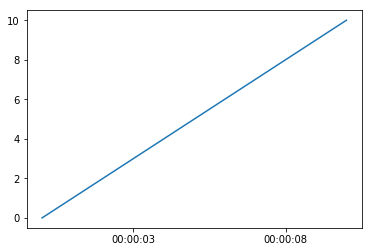

In [105]:
plt.figure(figsize = (6,4))
plt.plot(s.index,s.values)

In [106]:
df = pd.DataFrame({'age':[15,22,31,65,12],
                  'name':['Emma','Hannah','Grace','Emily','Sophia'],
                  'Gender':['F','M','F','M','F'],
                  'Count':[62,65,78,100,50]})

In [107]:
names = df.groupby('name').sum()

In [109]:
names.Count.std()

19.026297590440446

In [110]:
names.describe()

,age,Count
count,5.000000,5.000000
mean,29.000000,71.000000
std,21.412613,19.026298
min,12.000000,50.000000
25%,15.000000,62.000000
50%,22.000000,65.000000
75%,31.000000,78.000000
max,65.000000,100.000000


In [112]:
df

,age,name,Gender,Count
0,15,Emma,F,62
1,22,Hannah,M,65
2,31,Grace,F,78
3,65,Emily,M,100
4,12,Sophia,F,50


In [111]:
names.Count.idxmax()

'Emily'

In [113]:
df

,age,name,Gender,Count
0,15,Emma,F,62
1,22,Hannah,M,65
2,31,Grace,F,78
3,65,Emily,M,100
4,12,Sophia,F,50


In [114]:
df.isnull().sum()

age       0
name      0
Gender    0
Count     0
dtype: int64

In [115]:
df['ff'] = np.nan*len(df)

In [117]:
df

,age,name,Gender,Count,ff
0,15,Emma,F,62,NaN
1,22,Hannah,M,65,NaN
2,31,Grace,F,78,NaN
3,65,Emily,M,100,NaN
4,12,Sophia,F,50,NaN


In [118]:
df.notnull().sum()

age       5
name      5
Gender    5
Count     5
ff        0
dtype: int64

In [119]:
data = [['2018-10-01',10,20,12],['2018-10-02',20,20,15]]
df = pd.DataFrame(data,columns = ['Yr_Mo_Dy','RPT','VAL','ROS'])

In [120]:
df

,Yr_Mo_Dy,RPT,VAL,ROS
0,2018-10-01,10,20,12
1,2018-10-02,20,20,15


In [121]:
df.set_index('Yr_Mo_Dy')

,RPT,VAL,ROS
Yr_Mo_Dy,,,
2018-10-01,10,20,12
2018-10-02,20,20,15


In [143]:
df.index = ['a','b']

In [144]:
df

,Yr_Mo_Dy,RPT,VAL,ROS
a,2018-10-01,10,20,12
b,2018-10-02,20,20,15


In [149]:
df.reset_index()

,index,Yr_Mo_Dy,RPT,VAL,ROS
0,a,2018-10-01,10,20,12
1,b,2018-10-02,20,20,15


In [136]:
df.reset_index?

In [150]:
df = pd.DataFrame([('bird',    389.0),
...                    ('bird',     24.0),
...                    ('mammal',   80.5),
...                    ('mammal', np.nan)],
...                   index=['falcon', 'parrot', 'lion', 'monkey'],
...                   columns=('class', 'max_speed'))

In [151]:
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [155]:
df.reset_index()

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [157]:
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [156]:
df.set_index('class')

,max_speed
class,
bird,389.0
bird,24.0
mammal,80.5
mammal,NaN


In [159]:
df

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [162]:
df.reset_index(drop = True)

,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


In [161]:
df.reset_index?

In [200]:
index = pd.MultiIndex.from_tuples([('bird', 'falcon'),
...                                    ('bird', 'parrot'),
...                                    ('mammal', 'lion'),
...                                    ('mammal', 'monkey')],
...                                   names=['class', 'name'])
columns = pd.MultiIndex.from_tuples([('speed', 'max'),
...                                      ('species', 'type')])

In [165]:
index

MultiIndex(levels=[['bird', 'mammal'], ['falcon', 'lion', 'monkey', 'parrot']],
           labels=[[0, 0, 1, 1], [0, 3, 1, 2]],
           names=['class', 'name'])

In [166]:
columns

MultiIndex(levels=[['species', 'speed'], ['max', 'type']],
           labels=[[1, 0], [0, 1]])

In [201]:
df = pd.DataFrame([(389.0, 'fly'),
...                    ( 24.0, 'fly'),
...                    ( 80.5, 'run'),
...                    (np.nan, 'jump')],
...                   index=index,
...                   columns=columns)

In [168]:
df

speed species
                 max    type
class  name                 
bird   falcon  389.0     fly
       parrot   24.0     fly
mammal lion     80.5     run
       monkey    NaN    jump

In [203]:
df.reset_index(level = 'class')

,class,speed,species
,,max,type
name,,,
falcon,bird,389.0,fly
parrot,bird,24.0,fly
lion,mammal,80.5,run
monkey,mammal,NaN,jump


In [170]:
df.reset_index(level = 'class',col_level = 1)

,,speed,species
,class,max,type
name,,,
falcon,bird,389.0,fly
parrot,bird,24.0,fly
lion,mammal,80.5,run
monkey,mammal,NaN,jump


In [171]:
df.reset_index(level = 'class',col_level = 1,col_fill = 'species')

,species,speed,species
,class,max,type
name,,,
falcon,bird,389.0,fly
parrot,bird,24.0,fly
lion,mammal,80.5,run
monkey,mammal,NaN,jump


In [175]:
df2 = df.reset_index(level = 'class',col_level = 1,col_fill = 'genus')

In [180]:
df

speed species
                 max    type
class  name                 
bird   falcon  389.0     fly
       parrot   24.0     fly
mammal lion     80.5     run
       monkey    NaN    jump

In [181]:
df.set_index?

In [204]:
df = pd.DataFrame({'month': [1, 4, 7, 10],
...                    'year': [2012, 2014, 2013, 2014],
...                    'sale':[55, 40, 84, 31]})

In [205]:
df

,month,year,sale
0,1,2012,55
1,4,2014,40
2,7,2013,84
3,10,2014,31


In [206]:
df.set_index('month')

,year,sale
month,,
1,2012,55
4,2014,40
7,2013,84
10,2014,31


In [207]:
df3 = df.set_index(['year','month'])

In [208]:
df3

,,sale
year,month,
2012,1,55
2014,4,40
2013,7,84
2014,10,31


In [193]:
s3 = df3['sale']

In [197]:
s3

year  month
2012  1        55
2014  4        40
2013  7        84
2014  10       31
Name: sale, dtype: int64

In [211]:
df4 = df.set_index([list(range(len(df))),'year'])

In [213]:
df4

,,month,sale
,year,,
0,2012,1,55
1,2014,4,40
2,2013,7,84
3,2014,10,31


In [219]:
df4.index.names[1]

'year'

In [209]:
df.reindex?

In [220]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']

In [221]:
df = pd.DataFrame({
...      'http_status': [200,200,404,404,301],
...      'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
...       index=index)

In [222]:
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [223]:
new_index= ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10',
...             'Chrome']

In [224]:
df.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


In [225]:
df.reindex(new_index, fill_value=0)

,http_status,response_time
Safari,404,0.07
Iceweasel,0,0.00
Comodo Dragon,0,0.00
IE10,404,0.08
Chrome,200,0.02


In [226]:
df.reindex(columns=['http_status', 'user_agent'])

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


In [227]:
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [230]:
df.reindex({'Firefox':[202,0.9]})

,http_status,response_time
Firefox,200,0.04


In [229]:
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [231]:
df.rename?

In [232]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [233]:
df

,A,B
0,1,4
1,2,5
2,3,6


In [234]:
df.rename(index=str, columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [238]:
df.index.dtype

dtype('int64')

In [239]:
df.rename(str.lower,axis= 'columns')

,a,b
0,1,4
1,2,5
2,3,6


In [240]:
df.rename(index=str, columns={"A": "a", "C": "c"})

,a,B
0,1,4
1,2,5
2,3,6


In [253]:
index = pd.date_range('2019-01-01',periods = 90,freq = 'D')

In [254]:
df = pd.DataFrame(np.random.randint(0,10,size = 90),index = index)

In [259]:
df.resample('MS').mean()

,0
2019-01-01,3.870968
2019-02-01,4.392857
2019-03-01,4.612903


In [264]:
fig = plt.figure()
fig.set_size_inches(10,8)

<Figure size 720x576 with 0 Axes>

In [270]:
(df.index.max()-df.index.min()).days

89

In [271]:
cars = pd.DataFrame({'a':[1,2,3,4],'b':[5,6,7,8],'c':[np.nan]*4})

In [272]:
cars

,a,b,c
0,1,5,NaN
1,2,6,NaN
2,3,7,NaN
3,4,8,NaN


In [278]:
cars.loc[:,'a':'b']

,a,b
0,1,5
1,2,6
2,3,7
3,4,8


In [289]:
del cars['c']

In [290]:
cars

,a,b
0,1,5
1,2,6
2,3,7
3,4,8


In [362]:
df1 = pd.DataFrame({'a':['A','B','C'],'b':[1,2,3],'c':[3,4,5]})
df2 = pd.DataFrame({'a':['B','C','D'],'b':['T','F','T'],'c':[5,6,7]})

In [363]:
df1

,a,b,c
0,A,1,3
1,B,2,4
2,C,3,5


In [364]:
df2

,a,b,c
0,B,T,5
1,C,F,6
2,D,T,7


In [374]:
pd.merge(df1,df2,how = 'left',on = 'a')

,a,b_x,c_x,b_y,c_y
0,A,1,3,NaN,NaN
1,B,2,4,T,5.0
2,C,3,5,F,6.0


In [370]:
pd.concat([df1,df2])

,a,b,c
0,A,1,3
1,B,2,4
2,C,3,5
0,B,T,5
1,C,F,6
2,D,T,7


In [297]:
a = pd.DataFrame({'a':[1,2,3,4],'b':[5,6,7,8]})
b = pd.DataFrame(np.random.randint(5,10,(4,2)),columns = ['a','b'])

In [298]:
a

,a,b
0,1,5
1,2,6
2,3,7
3,4,8


In [299]:
b

,a,b
0,9,7
1,5,6
2,5,5
3,6,7


In [309]:
pd.concat([a,b],ignore_index = True,verify_integrity = True)

,a,b
0,1,5
1,2,6
2,3,7
3,4,8
4,9,7
5,5,6
6,5,5
7,6,7


In [316]:
# help(a.append)

In [308]:
a.append(b,ignore_index = True)

,a,b
0,1,5
1,2,6
2,3,7
3,4,8
4,9,7
5,5,6
6,5,5
7,6,7


In [303]:
a+b

,a,b
0,10,12
1,7,12
2,8,12
3,10,15


In [317]:
df1 = pd.DataFrame({'a':['A','B','C'],'b':[1,2,3]})
df2 = pd.DataFrame({'a':['B','C','D'],'b':[2,3,4]})

In [319]:
df1

,a,b
0,A,1
1,B,2
2,C,3


In [320]:
df2

,a,b
0,B,2
1,C,3
2,D,4


In [326]:
pd.merge(df1,df2,how = 'outer')

,a,b
0,A,1
1,B,2
2,C,3
3,D,4


In [329]:
pd.concat([df1,df2],axis=1)

,a,b,a,b
0,A,1,B,2
1,B,2,C,3
2,C,3,D,4


In [330]:
pd.concat([df1,df2])

,a,b
0,A,1
1,B,2
2,C,3
0,B,2
1,C,3
2,D,4


In [332]:
df1.columns = ['c','d']

In [333]:
pd.concat([df1,df2],sort = True)

,a,b,c,d
0,NaN,NaN,A,1.0
1,NaN,NaN,B,2.0
2,NaN,NaN,C,3.0
0,B,2.0,NaN,NaN
1,C,3.0,NaN,NaN
2,D,4.0,NaN,NaN


In [334]:
df1 = pd.DataFrame({'a':[12,121]})
df2 = pd.DataFrame({'a':['D',21],'b':['C','B']})

In [341]:
pd.concat([df1,df2],axis=0,sort=True)

,a,b
0,12,NaN
1,121,NaN
0,D,C
1,21,B


In [342]:
df1 = pd.DataFrame({'a':[12,121]})
df2 = pd.DataFrame({'a':['D',21],'b':['C','B']})

In [343]:
pd.concat([df1,df2],axis=1)

,a,a,b
0,12,D,C
1,121,21,B


In [344]:
df1 = pd.DataFrame({'a':[12,121]})
df2 = pd.DataFrame({'a':['D',21]})

In [345]:
pd.concat([df1,df2])

,a
0,12
1,121
0,D
1,21


In [346]:
df = pd.DataFrame({"a" : [5 ,2,],"b" :[4, 5,]})
df1 = pd.DataFrame({"a" : [4 ,2],"b" :[7, 5]})

In [349]:
pd.concat([df,df1],axis=1)

,a,b,a,b
0,5,4,4,7
1,2,5,2,5


In [350]:
df = pd.DataFrame({"a" : [5 ,2,],"b" :[4, 5]})

In [351]:
df.rename(columns = {'a':'aaa','b':'bbb'})

,aaa,bbb
0,5,4
1,2,5


In [352]:
df

,a,b
0,5,4
1,2,5


In [354]:
df2 = df.set_index([[0,1],'a'])

In [355]:
df2.index

MultiIndex(levels=[[0, 1], [2, 5]],
           labels=[[0, 1], [1, 0]],
           names=[None, 'a'])

D:\appinstallation\anacondainstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


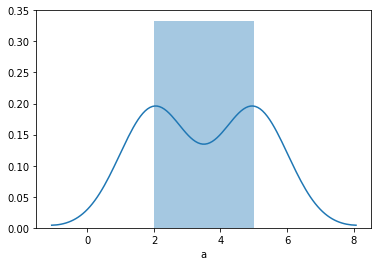

In [377]:
import seaborn as sns
sns.distplot(df.a)

D:\appinstallation\anacondainstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

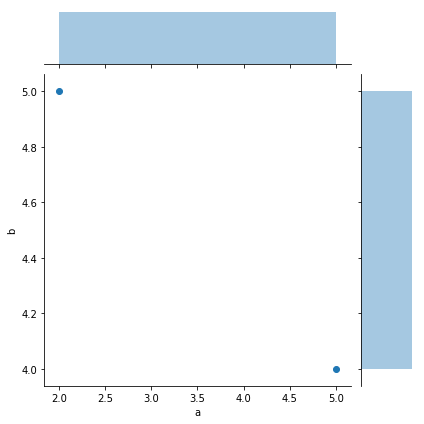

In [380]:
sns.despine()
sns.jointplot(df.a,df.b)

  Name sex age
0   张三   男  21
1   张三   男  21
2   张三   男  21
[16  1 10  9  8 11  4 14  8 19]


(array([2., 0., 1., 2., 2., 1., 0., 2.]),
 array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  , 12.25, 14.5 , 16.75, 19.  ]),
 <a list of 8 Patch objects>)

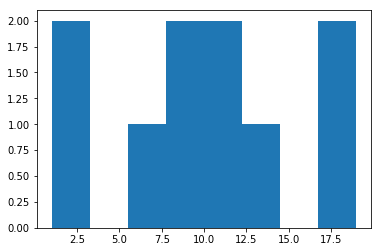

In [393]:
sss = {'Name':'张三','sex':'男','age':'21'}
df = pd.DataFrame(sss,index = list([0,1,2]))
print(df)
sssad = df.age.sort_values(ascending = False)
binsVal = np.arange(0,600,10)
print(np.random.randint(0,20,10))
plt.hist(np.random.randint(0,20,10), bins = 8)

In [394]:
data = {'row_1': [3, 2, 1, 0], 'row_2': [2,4,5,6]}
df = pd.DataFrame(data)

In [395]:
df.idxmax()

row_1    0
row_2    3
dtype: int64

In [407]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data, orient='index')

In [408]:
df

,0,1,2,3
row_1,3,2,1,0
row_2,a,b,c,d


In [411]:
s = pd.Series(np.random.randint(0,10,size = 10))

In [412]:
s

0    9
1    1
2    7
3    6
4    9
5    1
6    7
7    9
8    3
9    7
dtype: int32

D:\appinstallation\anacondainstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


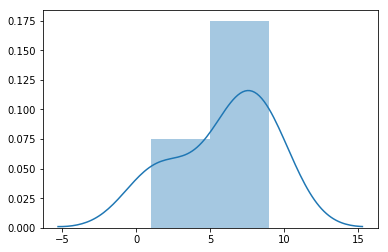

In [413]:
sns.distplot(s)

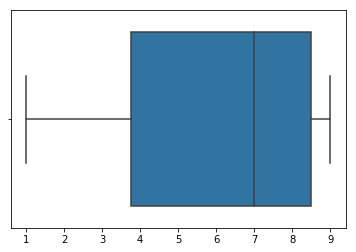

In [414]:
sns.boxplot(s)

D:\appinstallation\anacondainstall\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


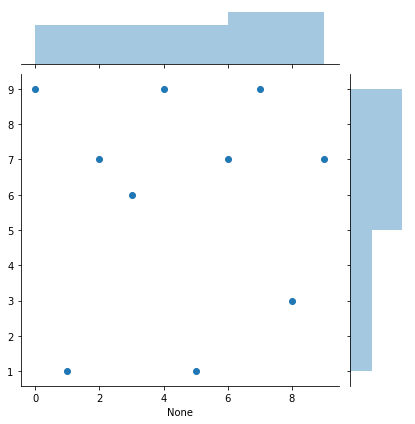

In [420]:
sns.jointplot(s.index,s.values)

In [422]:
df = pd.DataFrame(np.random.randint(0,10,(5,4)),columns = list('abcd'))

<Figure size 432x288 with 0 Axes>

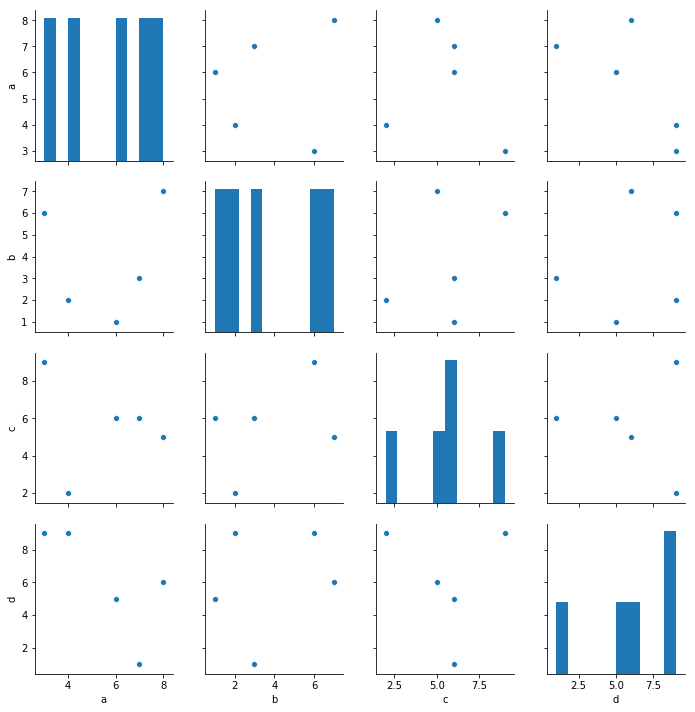

In [426]:
sns.despine()
sns.pairplot(df)

[7 9 7 7 5 6 6 6 7 5 7 7 8 5 5 8 7 6 7 7]


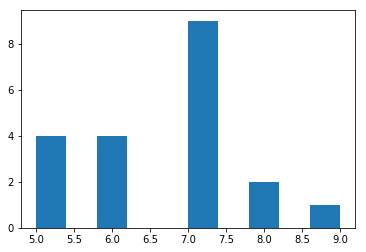

In [444]:
s = np.random.randint(5,10,20)
print(s)
plt.hist(s, bins = 10)
plt.show()

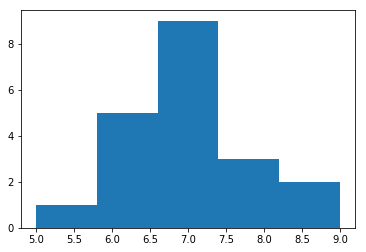

In [443]:
plt.hist(s,bins = 5)
plt.show()

In [445]:
df

,Name,sex,age
0,张三,男,21
1,张三,男,21
2,张三,男,21


In [448]:
df.shape[0]

3

In [449]:
data = {'row_1': [3, 2, 1, 0], 'row_2': [2,4,5,6]}
df = pd.DataFrame(data) 

In [451]:
df

,row_1,row_2
0,3,2
1,2,4
2,1,5
3,0,6


In [450]:
df.idxmax()

row_1    0
row_2    3
dtype: int64

In [452]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data, orient='index')

In [453]:
df

,0,1,2,3
row_1,3,2,1,0
row_2,a,b,c,d


In [455]:
df = pd.DataFrame({'num':[12,25,3,9],'name':['jack','bob','mark','david'],'price':[12.33,2.55,3.77,1.99],'item_name':['cake','cola','juice','fruit']})

In [456]:
df

,num,name,price,item_name
0,12,jack,12.33,cake
1,25,bob,2.55,cola
2,3,mark,3.77,juice
3,9,david,1.99,fruit


In [457]:
df.sort_values('price',ascending = False)

,num,name,price,item_name
0,12,jack,12.33,cake
2,3,mark,3.77,juice
1,25,bob,2.55,cola
3,9,david,1.99,fruit


In [458]:
df.price.sort_values(ascending = False)

0    12.33
2     3.77
1     2.55
3     1.99
Name: price, dtype: float64

In [459]:
df = pd.DataFrame({'num':[12,25,3,9],'name':['jack','bob','mark','david'],'price':[12.33,2.55,3.77,1.99],'item_name':['cake','cola','juice','fruit']})

In [460]:
df

,num,name,price,item_name
0,12,jack,12.33,cake
1,25,bob,2.55,cola
2,3,mark,3.77,juice
3,9,david,1.99,fruit


<BarContainer object of 4 artists>

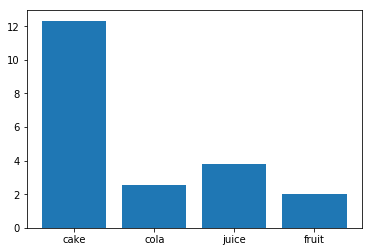

In [463]:
plt.bar(df.item_name,df.price)

In [464]:
df = pd.DataFrame({'num':[12,25,3,9],'name':['jack','bob','mark','david'],'price':[12.33,2.55,3.77,1.99],'item_name':['cake','cola','juice','fruit']})

In [467]:
df.groupby('name').count()

,num,price,item_name
name,,,
bob,1,1,1
david,1,1,1
jack,1,1,1
mark,1,1,1


In [468]:
df.groupby('name').size()

name
bob      1
david    1
jack     1
mark     1
dtype: int64

In [469]:
df = pd.DataFrame({'num':[12,25,3,9],'name':['jack','bob','mark','david'],'price':[12.33,2.55,3.77,1.99],'item_name':['cake','cola','juice','fruit']})

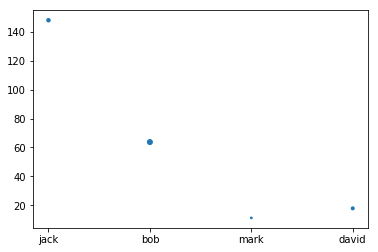

In [470]:
plt.scatter(df.name,df.num*df.price,s = df.num)

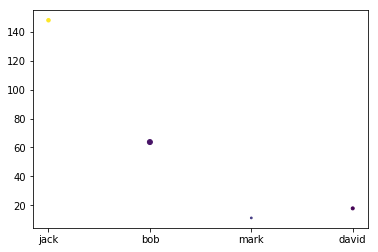

In [471]:
plt.scatter(df.name,df.num*df.price,s = df.num,c = df.price)

In [472]:
df

,num,name,price,item_name
0,12,jack,12.33,cake
1,25,bob,2.55,cola
2,3,mark,3.77,juice
3,9,david,1.99,fruit


In [476]:
df[['num']]

,num
0,12
1,25
2,3
3,9


In [477]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "hp": [45, 39, 44, 45],                      
            }
df = pd.DataFrame(raw_data)

In [478]:
df

,name,hp
0,Bulbasaur,45
1,Charmander,39
2,Squirtle,44
3,Caterpie,45


In [479]:
df[df.hp.isin(df.nlargest(1,'hp').hp)]

,name,hp
0,Bulbasaur,45
3,Caterpie,45


In [480]:
df[df.hp.isin([df.hp.sort_values(ascending = False)[0]])]

,name,hp
0,Bulbasaur,45
3,Caterpie,45


In [483]:
df.nlargest(2,'hp').hp

0    45
3    45
Name: hp, dtype: int64

In [484]:
df.hp.isin(df.nlargest(1,'hp').hp)

0     True
1    False
2    False
3     True
Name: hp, dtype: bool

In [495]:
df[df.hp == df.hp.sort_values(ascending =False)[0]]

,name,hp
0,Bulbasaur,45
3,Caterpie,45


In [496]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "pokedex": ['yes', 'no','yes','no']                        
            }
df = pd.DataFrame(raw_data)

In [498]:
df.pokedex[df.pokedex == 'yes']='zhao'

In [499]:
df

,name,pokedex
0,Bulbasaur,zhao
1,Charmander,no
2,Squirtle,zhao
3,Caterpie,no


In [501]:
df.dtypes

name       object
pokedex    object
dtype: object

In [502]:
df = pd.DataFrame({'a': [1, 10, 8, 10, -1],
...                    'b': list('abdce'),
...                    'c': [1.0, 2.0, np.nan, 3.0, 4.0]})

In [503]:
df

,a,b,c
0,1,a,1.0
1,10,b,2.0
2,8,d,NaN
3,10,c,3.0
4,-1,e,4.0


In [504]:
df.nlargest(3,'a')

,a,b,c
1,10,b,2.0
3,10,c,3.0
2,8,d,NaN


In [505]:
df.nlargest(3,'a',keep = 'last')

,a,b,c
3,10,c,3.0
1,10,b,2.0
2,8,d,NaN


In [506]:
df.nlargest(3,['a','c'])

,a,b,c
3,10,c,3.0
1,10,b,2.0
2,8,d,NaN


In [508]:
# df.nlargest(3,'b')

In [509]:
df.nsmallest(3,'a')

,a,b,c
4,-1,e,4.0
0,1,a,1.0
2,8,d,NaN


In [512]:
pd.Series([True, False]).any()

True

In [513]:
pd.Series([True,False]).all()

False

In [514]:
pd.Series([False, False]).any()

False

In [516]:
pd.Series([True, True]).all()

True

In [517]:
df = pd.DataFrame(np.random.randint(0,20,15).reshape(3,5))

In [518]:
df[df>7]

,0,1,2,3,4
0,17.0,19,10.0,NaN,NaN
1,14.0,11,NaN,NaN,NaN
2,NaN,11,NaN,18.0,NaN


In [519]:
df=pd.DataFrame(np.arange(12).reshape(3,4),columns=list('ABCD'))

In [520]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [521]:
df[['A','B']]

,A,B
0,0,1
1,4,5
2,8,9


In [525]:
df.loc[:,'A':'B']

,A,B
0,0,1
1,4,5
2,8,9


In [535]:
df1=pd.DataFrame(np.arange(30).reshape(5,6),columns=list('ABCDEF'))

In [537]:
df1.iloc[:,[1,3,5]]

,B,D,F
0,1,3,5
1,7,9,11
2,13,15,17
3,19,21,23
4,25,27,29


In [538]:
df1=pd.DataFrame(np.arange(20).reshape(4,5),columns=['abc','bca','aaa','ddd','abd'])

In [539]:
df1.filter(regex = 'ab[c-d]')

,abc,abd
0,0,4
1,5,9
2,10,14
3,15,19


In [540]:
df=pd.DataFrame(np.arange(12).reshape(3,4),columns=list('ABCD'))

In [541]:
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [542]:
df[(df.A>3)&(df.C>3)]

,A,B,C,D
1,4,5,6,7
2,8,9,10,11


In [543]:
df 

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [545]:
df.assign(E = lambda x:x.A+x.B)

,A,B,C,D,E
0,0,1,2,3,1
1,4,5,6,7,9
2,8,9,10,11,17


In [546]:
df = pd.DataFrame({'a':[1,2,3],'b':[5,6,7]},columns = list('AB'))

In [547]:
df

,A,B


In [548]:
df.drop?

In [549]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
...                    'B': {0: 1, 1: 3, 2: 5},
...                    'C': {0: 2, 1: 4, 2: 6}})

In [550]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [551]:
df.melt(id_vars = ['A'],value_vars = ['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
